# PCA and autoencoders

* 此份 Notebook 主要是參考李弘毅的 PCA&AutoEncoder 教學影片，當中部份截圖也是來自老師的投影片當中
連結如下
http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA.mp4
* 並且實作投影片中所講到的範例，實際用程式來驗證是否了解演法裡面的細節
* 實作的部份主要分為兩大部份如下
* PCA
* AutoEncoder
  * Simple AutoEncoder
  * Deep AutoEncoder
  * Convolution AutoEncoder
  * VAE AutoEncoder


In [4]:
# Numpy is our primary dependency
import numpy as np

# Import datasets from scikit-learn only to get the iris data set
from sklearn import datasets

# We will need some plotting too
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#假設你要讓每一個 chart inline 獨立顯示
%matplotlib inline 

## The Dataset
我們使用 sklearn 當中的 MMinst DataSet 作為練習的資料，內容為手寫數字辨識，在各種 Deep Learning Tutorial 中很常出現 

In [5]:
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np


mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

In [6]:
# 他是一個 8*8 影像矩陣
X.shape

(1797, 64)

這個數字 #5#


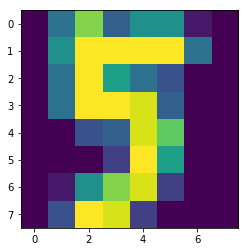

In [7]:
print("這個數字 #{}#".format(y[33]))
plt.imshow(X[33].reshape(8,8), interpolation='nearest')
plt.show()

## PCA 核心算法精神
* 因為是要進行 Feature Dimession Reduction，所以先計算各feature間 distribution 的covariance，故先產出 covariance matrix
* 根據 PCA 的推導過表，可以得知 W 矩陣中的每一個 Vector 互為 orthogonal 即為 orthogonal matrix ，故可以想像成降維後的 feature 間是沒有相依性，白話的就是如果拿這些 feature 進行預測可以使用 linear combination 的 model ，核心精神可以參考下圖
<img width="45%" src="./imgs/pca_basic.png" >
* 接下對 cov matrix ，求出 eigen_value 及 eigen_vector
* 直觀的看法如下例這張圖

<img width="50%" src="./imgs/svd.png" >

## 接下來算出各 Feature間的 covarience matrix(因為要對 Feature 進行降維！！)

In [8]:
# 計算 varience 前，先計算各 feature 的 mean
mean = np.mean(X,axis=0)
# 計算每個一點和 mean 之間的差，及為各資料點的varience
x_x = X-mean

In [9]:
# 計算 covarience matrix
cov = np.matmul(x_x.transpose(),x_x)/mean.shape[0]

In [10]:
# 用 np 的 function 算出 eigenvalue 及 eigevecto
value,vec = np.linalg.eig(cov)

In [11]:
# 確認一下 shape 是否為 8*8 ，因為是計算 feature 間的 covairence
value.shape

(64,)

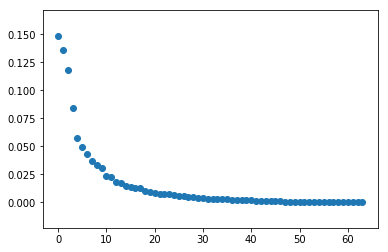

In [12]:
# 再來看 eigen_value 遞減佔比，由此可以看出大約前 8 個 componet 就佔了大部份
y_eigen_value = []
for i in range(8*8):
    y_eigen_value.append(value[i]/np.sum(value))

plt.scatter(range(0,8*8), y_eigen_value , cmap=plt.cm.spectral)
plt.show()

In [13]:
# 因為 PCA 產出的值為負到正的浮點數，故需先作平移，才能視覺化成現
new_vec = ((vec+1)*128).astype(int)

In [14]:
# 來看一下 componet

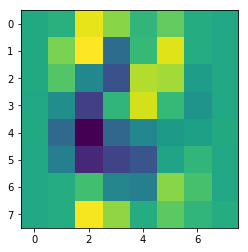

In [15]:
plt.imshow(new_vec[:,0].reshape(8,8), interpolation='nearest')

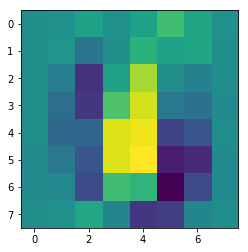

In [16]:
plt.imshow(new_vec[:,1].reshape(8,8), interpolation='nearest')

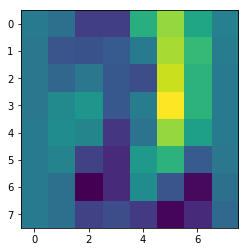

In [17]:
plt.imshow(new_vec[:,2].reshape(8,8), interpolation='nearest')

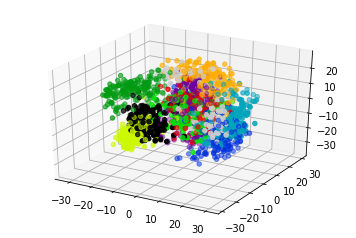

In [18]:
# new_X 為降為過後，降成三維
new_X = np.matmul(X,vec[:,:3])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

In [19]:
# 將投影的結果，進行 Normalize ，以便好計算兩兩間的 similarity
from sklearn.preprocessing import normalize
new_X_normlized = normalize(new_X)

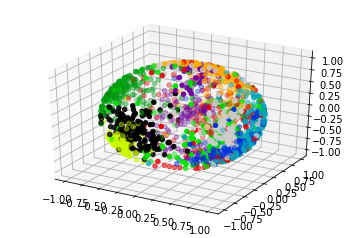

In [20]:
# 因為進行 normalize 了，故成現球形的分佈
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(new_X_normlized[:, 0], new_X_normlized[:, 1], new_X_normlized[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

這個數字 #2#


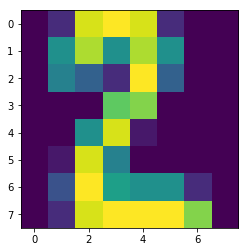

這個數字 #2#


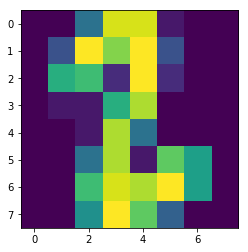

這個數字 #2#


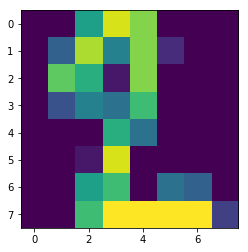

這個數字 #2#


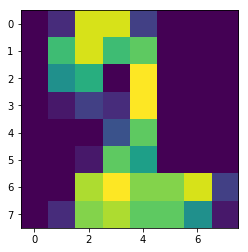

這個數字 #2#


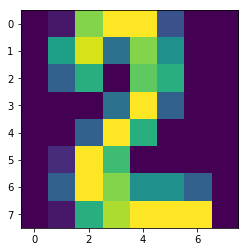

這個數字 #2#


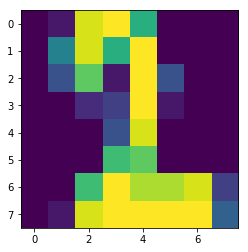

這個數字 #2#


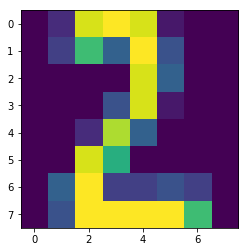

這個數字 #2#


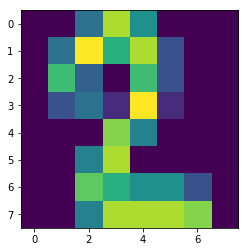

這個數字 #8#


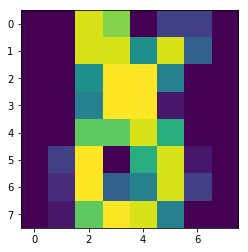

這個數字 #2#


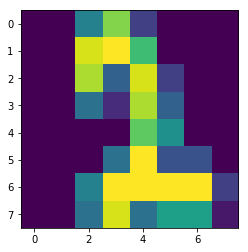

這個數字 #2#


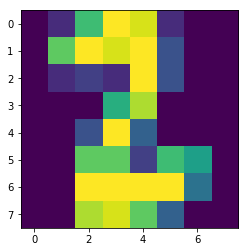

這個數字 #8#


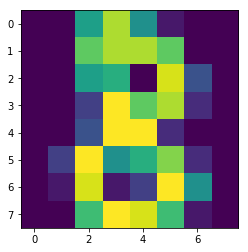

這個數字 #8#


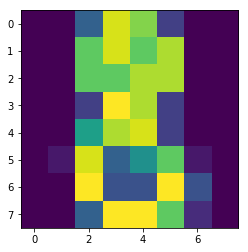

這個數字 #8#


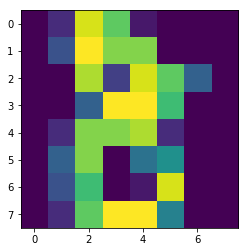

這個數字 #2#


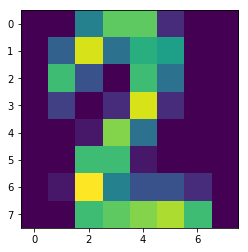

這個數字 #2#


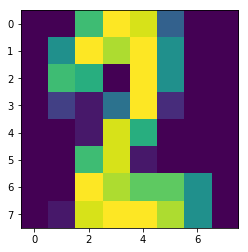

這個數字 #2#


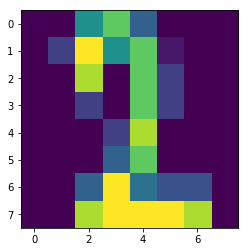

這個數字 #2#


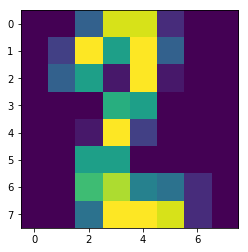

這個數字 #2#


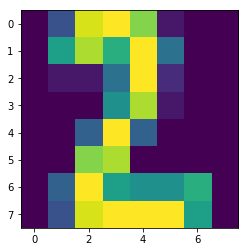

這個數字 #1#


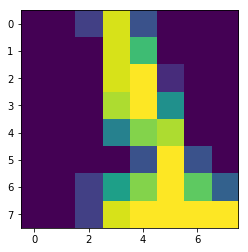

這個數字 #8#


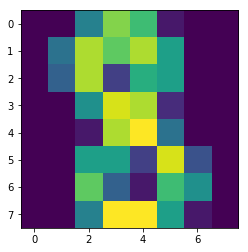

這個數字 #2#


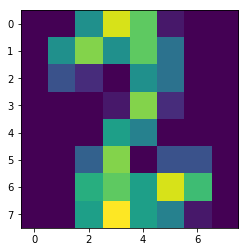

這個數字 #2#


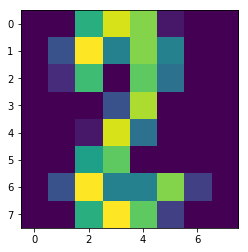

這個數字 #2#


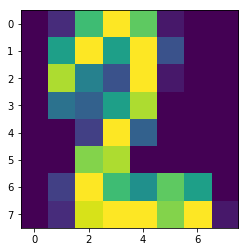

這個數字 #2#


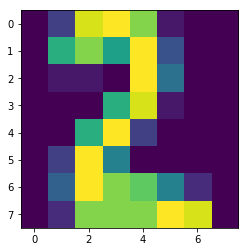

這個數字 #3#


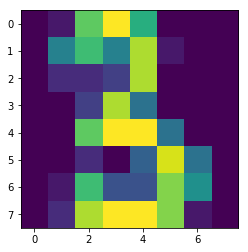

這個數字 #2#


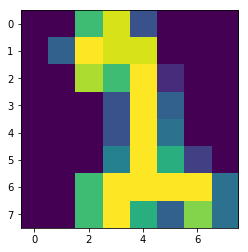

這個數字 #2#


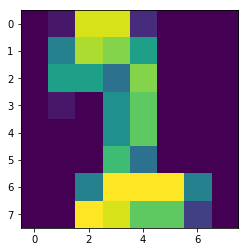

這個數字 #2#


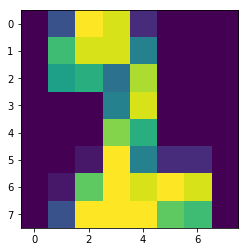

這個數字 #2#


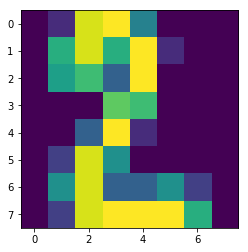

In [21]:
# 計算看看 similarity

test_index = 333
new_X_normlized

sims = np.matmul(new_X_normlized,new_X_normlized[test_index])

for i in sims.argsort()[-30:][::-1]:
    print("這個數字 #{}#".format(y[i]))
    plt.imshow(X[i].reshape(8,8), interpolation='nearest')
    plt.show()



## 使用現成的套件看看跟我自已算的是否有一樣

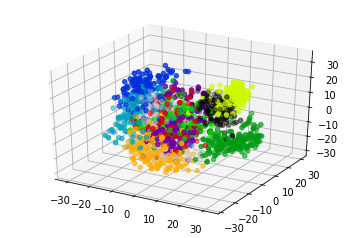

In [22]:
pca = decomposition.PCA(n_components=3)
new_X = pca.fit_transform(X)

fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

# Autoencoders by Keras

* 其實 PCA 降維的動作，就是找出一組 W1 進行空間轉換到另外一個低維度的空間
* 如果再進一步思考，此降為後的 encoded vector ，再來另外一組 W2，還原成 X
* PCA另外轉換思考 就是想要 minizie  X 轉換前後的差，故可以想像成底下的 auto encoder
<img width='50%' src='imgs/pcaautoencoder.png' >


In [23]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


## load data

In [24]:
# 為何要 load 另外一組 dataset 呢，原因是因為要 sklearn 的 data 量太少，經過實驗後無法學到好的 encode 效果
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 53s 5us/step


## 設計 autoencoder 的 net，一些要點
* 有三組 Weight Matrix，分別為 Encoder、Decoder及 Hidden Layer， Dimession 分為 $$28^2*32, 32^2, 32*28^2$$
* 以下的範例特別加了一層 Hidden Layer ，理論可以再加上更多的 Hideen Lyaer
* 中間層(除了最後一層) 的 activation function 均採用 relu ，主要的原因是 Vanishing gradient problem ， sigmoid function 在 x>2 or x<-2 之後的 gradient 會開始趨近零，故在多層傳遞下 gradient 會快速的消失。
* 最後一層為 sigmoid 的理由(https://medium.com/towards-data-science/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f)





In [25]:
h1_size = 32
h2_size = 32
input_img = Input(shape=(28*28,))
encoder = Dense(h1_size,activation='relu')(input_img)
hidden = Dense(h2_size,activation='relu')(encoder)
 
# 最後一層的輸出改用 sigmoid ，因為 relu 的出輸結果無法 bound 在 0~1 之間
decoder = Dense(28*28,activation='sigmoid')(hidden)
autoencoder = Model(input_img, decoder)
autoencoder.compile(loss='binary_crossentropy',optimizer='adadelta')

In [26]:
# 由於必需要計算 cross entropy 作 lose function ，x 的值必需要 normalize 到介於 0 到 1 之間
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 由於沒有要做 2D Convolution 故 reshape 成一維
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## training 

In [27]:
encoder_model = Model(input_img,encoder)
decoder_model = Model(input_img,decoder)

In [28]:

autoencoder.fit(x_train, x_train,
                epochs=500,
                verbose=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
 - 3s - loss: 0.3684 - val_loss: 0.2697
Epoch 2/500
 - 1s - loss: 0.2659 - val_loss: 0.2600
Epoch 3/500
 - 1s - loss: 0.2508 - val_loss: 0.2382
Epoch 4/500
 - 1s - loss: 0.2294 - val_loss: 0.2195
Epoch 5/500
 - 1s - loss: 0.2136 - val_loss: 0.2046
Epoch 6/500
 - 1s - loss: 0.1997 - val_loss: 0.1923
Epoch 7/500
 - 1s - loss: 0.1894 - val_loss: 0.1838
Epoch 8/500
 - 1s - loss: 0.1824 - val_loss: 0.1780
Epoch 9/500
 - 1s - loss: 0.1771 - val_loss: 0.1734
Epoch 10/500
 - 1s - loss: 0.1729 - val_loss: 0.1698
Epoch 11/500
 - 1s - loss: 0.1695 - val_loss: 0.1664
Epoch 12/500
 - 1s - loss: 0.1662 - val_loss: 0.1630
Epoch 13/500
 - 1s - loss: 0.1627 - val_loss: 0.1595
Epoch 14/500
 - 1s - loss: 0.1591 - val_loss: 0.1559
Epoch 15/500
 - 1s - loss: 0.1555 - val_loss: 0.1525
Epoch 16/500
 - 1s - loss: 0.1523 - val_loss: 0.1495
Epoch 17/500
 - 1s - loss: 0.1495 - val_loss: 0.1469
Epoch 18/500
 - 1s - loss: 0.1470 - val_loss: 0.1443
Epoch

Epoch 154/500
 - 1s - loss: 0.1011 - val_loss: 0.0997
Epoch 155/500
 - 1s - loss: 0.1010 - val_loss: 0.0995
Epoch 156/500
 - 1s - loss: 0.1009 - val_loss: 0.0994
Epoch 157/500
 - 1s - loss: 0.1008 - val_loss: 0.0994
Epoch 158/500
 - 1s - loss: 0.1007 - val_loss: 0.0993
Epoch 159/500
 - 1s - loss: 0.1007 - val_loss: 0.0993
Epoch 160/500


KeyboardInterrupt: 

In [29]:
# encode and decode some digits
# note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder_model.predict(x_test[:100].reshape(100,28*28))

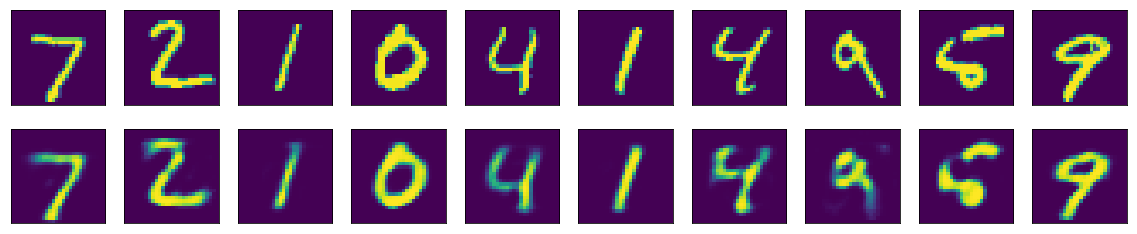

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
new_X = encoder_model.predict(x_test.reshape(x_test.shape[0],28*28))

In [32]:
new_X = (new_X*255).astype('int32')

In [33]:
import numpy as np
from sklearn.manifold import TSNE
X = new_X[:1000]
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape

(1000, 3)

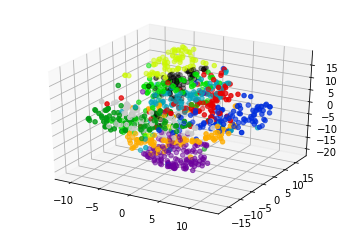

In [34]:


fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_test[:1000], cmap=plt.cm.spectral)
plt.show()

# Deep AutoEncoder

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [36]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.3459 - val_loss: 0.2644
Epoch 2/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2595 - val_loss: 0.2531
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2454 - val_loss: 0.2393
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2346 - val_loss: 0.2273
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2244 - val_loss: 0.2200
Epoch 6/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2184 - val_loss: 0.2137
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2086 - val_loss: 0.2010
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1974 - val_loss: 0.1924
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1896 - val_loss: 0.1

60000/60000 [==============================] - 2s 31us/step - loss: 0.1063 - val_loss: 0.1052
Epoch 78/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1060 - val_loss: 0.1045
Epoch 79/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1057 - val_loss: 0.1043
Epoch 80/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1055 - val_loss: 0.1040
Epoch 81/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1052 - val_loss: 0.1035
Epoch 82/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1050 - val_loss: 0.1040
Epoch 83/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1048 - val_loss: 0.1033
Epoch 84/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1045 - val_loss: 0.1027
Epoch 85/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1043 - val_loss: 0.1025
Epoch 86/100
60000/60000 [========================

In [37]:
decoded_imgs = autoencoder.predict(x_test[:100].reshape(100,28*28))

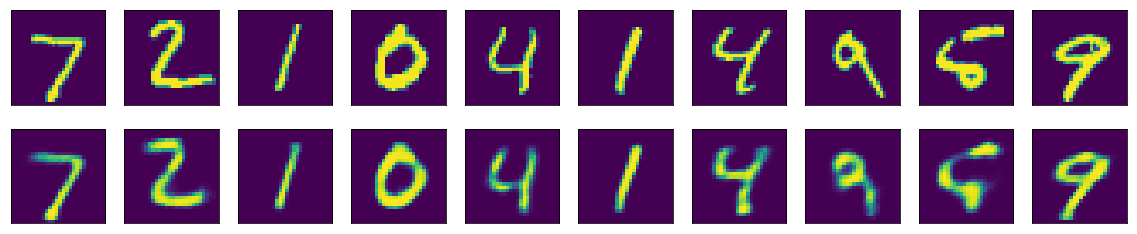

In [38]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional AutoEncoder

In [39]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

In [40]:
input_img = Input([28*28])
reshape_img = Reshape([28,28,1])(input_img)

conv1 = Conv2D(16,[3,3],padding='same')(reshape_img)
maxpool1 = MaxPooling2D([2,2])(conv1)

conv2 = Conv2D(8,[3,3],padding='same')(maxpool1)
maxpool2 = MaxPooling2D((2, 2), padding='same')(conv2)

conv3 = Conv2D(8, (3, 3), activation='relu', padding='same')(maxpool2)
maxpool3 = MaxPooling2D((2, 2), padding='same')(conv3)
encoder = Model(input_img,maxpool3)

# encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
__________

In [41]:
re_conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(maxpool3)
up1 = UpSampling2D((2, 2))(re_conv1)


re_conv2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(re_conv2)

re_conv3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(re_conv3)


re_conv4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

reshape_img2 = Reshape([28*28])(re_conv4)

decoder = Model(input_img,reshape_img2)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
__________

In [42]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1007 - val_loss: 0.0990
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1002 - val_loss: 0.0991
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0999 - val_loss: 0.0981
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0995 - val_loss: 0.0983
Epoch 5/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0992 - val_loss: 0.0994
Epoch 6/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0989 - val_loss: 0.0978
Epoch 7/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0987 - val_loss: 0.0978
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0984 - val_loss: 0.0975
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0982 - val_loss: 0.0976
Epoch

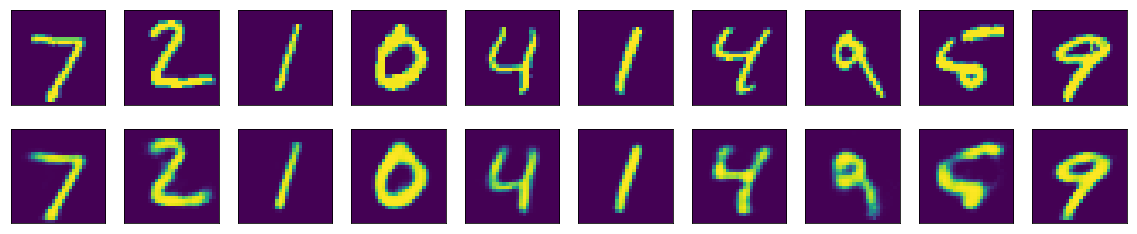

In [43]:
decoded_imgs = autoencoder.predict(x_test[:100].reshape(100,28*28))   
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
#看一下 encode 分佈的結果　

In [45]:
ymaping = [[],[],[],[],[],[],[],[],[],[],]

for idx, val in enumerate(y_test):    
    ymaping[val].append(idx)

In [46]:
test_image = x_test[ymaping[0]]
test_images_encode = encoder.predict(test_image.reshape((test_image.shape[0],28*28)))

In [47]:
test_images_encode.shape

(980, 4, 4, 8)

In [48]:
X_embedded = TSNE(n_components=1).fit_transform(test_images_encode.reshape((980,4*4*8)))

In [49]:
sorted_index = np.argsort(X_embedded.reshape(980)).tolist()

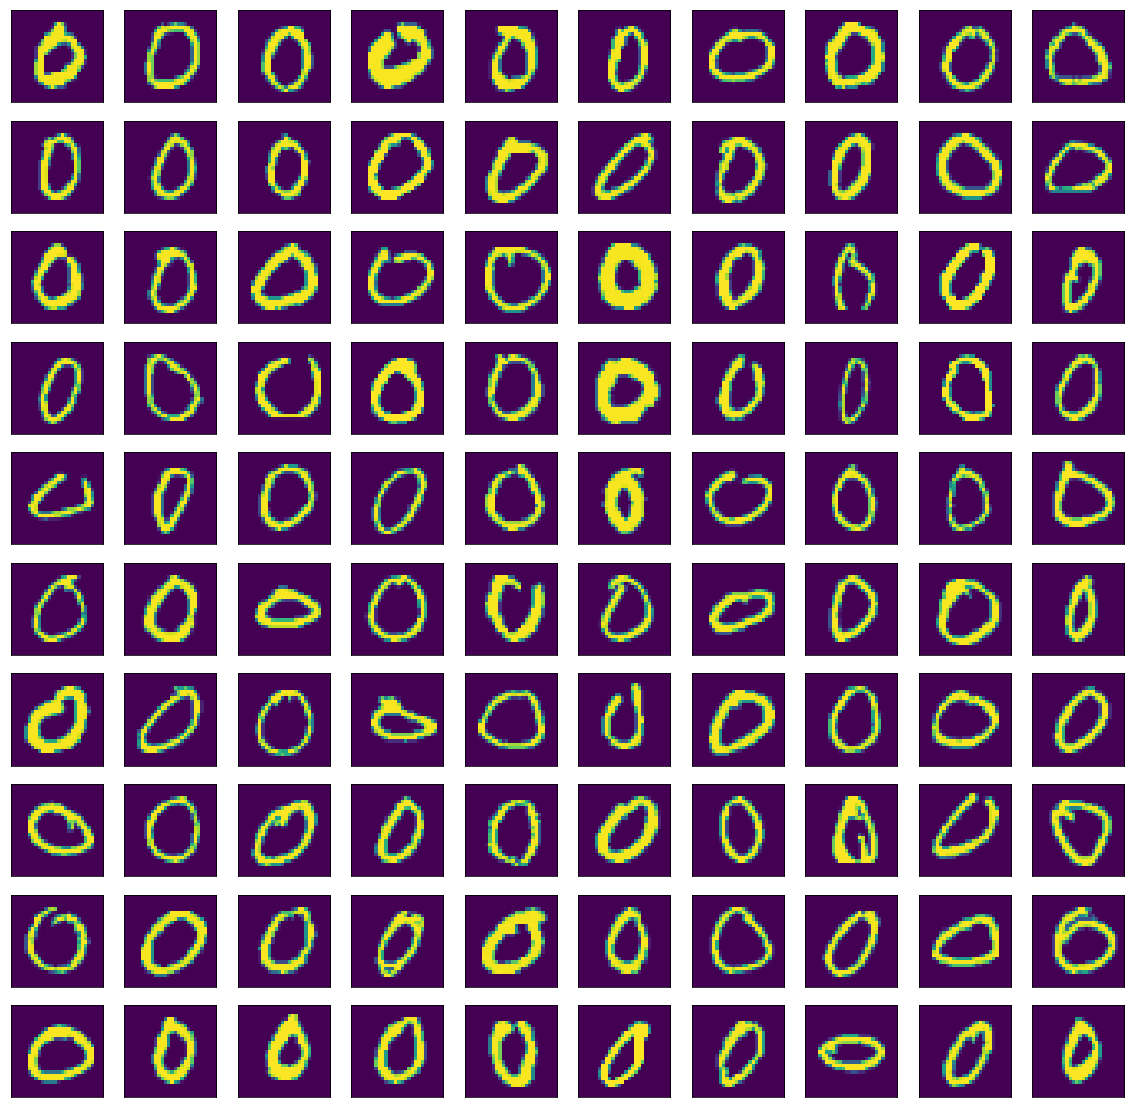

In [50]:
plt.figure(figsize=(20, 20)) 
n = len(sorted_index)
for index,value in enumerate(sorted_index):
    if index >= 100 : break

    ax = plt.subplot(10,10, index+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(  x_test[ymaping[0][index]].reshape(28,28)   , interpolation='nearest')
plt.show()


# VAE AutoEncoder
* 基本精神為確保 Encode 後的 laten vector 必需也是一個 Normal Distribution(很大膽的假設)
* 接下來設 Laten Vector's Distribution 與 Normal Distribution 的 KL Divergence 為 Lose Function 
* 對此 lose function 作 minimize 
* 直觀的說明可以參考 https://sherlockliao.github.io/2017/06/24/vae/

In [51]:
'''This script demonstrates how to build a variational autoencoder with Keras.
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

In [52]:
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [53]:
# Custom loss layer
class CustomVariationalLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x, x_decoded_mean):
        xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        x_decoded_mean = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

y = CustomVariationalLayer()([x, x_decoded_mean])
vae = Model(x, y)
vae.compile(optimizer='rmsprop', loss=None)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.


In [54]:



# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 189.0181 - val_loss: 172.4034
Epoch 2/50
60000/60000 [==============================] - 3s 53us/step - loss: 169.5904 - val_loss: 168.4337
Epoch 3/50
60000/60000 [==============================] - 3s 52us/step - loss: 166.0541 - val_loss: 164.8777
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 163.7728 - val_loss: 163.0374
Epoch 5/50
60000/60000 [==============================] - 3s 52us/step - loss: 161.9266 - val_loss: 161.6456
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 160.4076 - val_loss: 159.9622
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 159.2036 - val_loss: 158.8771
Epoch 8/50
60000/60000 [==============================] - 3s 52us/step - loss: 158.2732 - val_loss: 158.3070
Epoch 9/50
60000/60000 [==============================] - 3s 52us/step - loss:

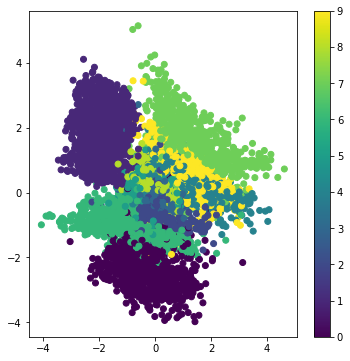

In [55]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [56]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)


In [57]:
decoded_imgs = vae.predict(x_train[:100])

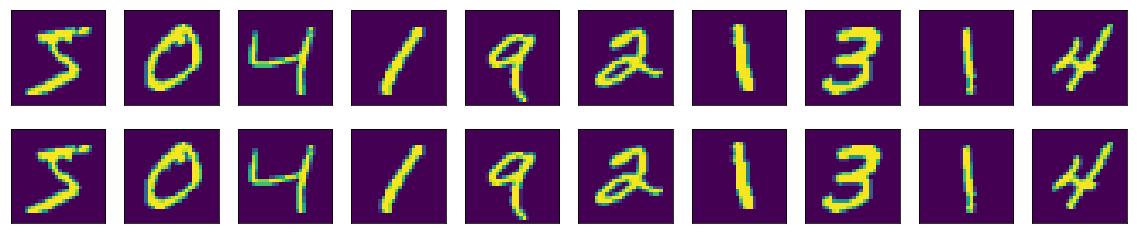

In [58]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

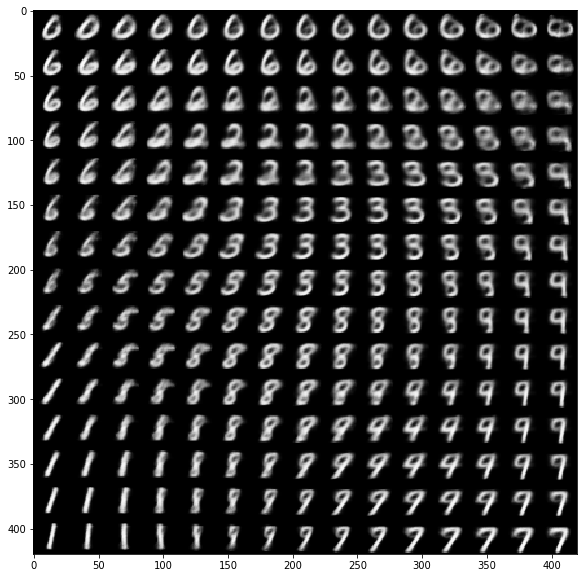

In [59]:

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()